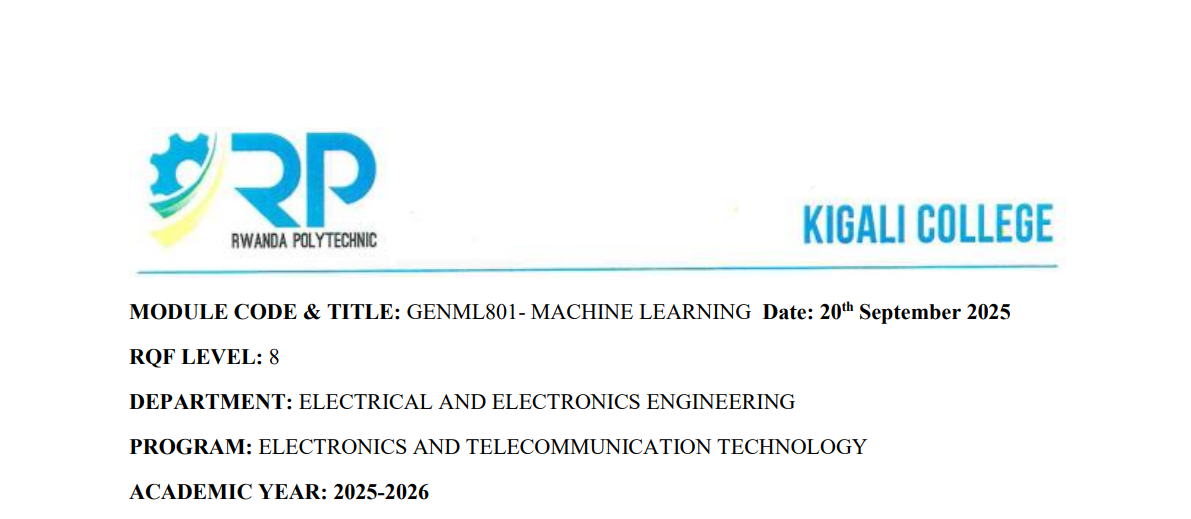

##                NAMES: Niganze Muvunyi AArthur
##                reg no: 25RP19276


# 1. Define a Problem Statement

• Clearly state the problem you want to solve with the dataset.
    
• Explain why this problem is important and how solving it can provide insights.

# answer

## Problem Statement (Summary)
Industrial machines often suffer from unexpected failures, leading to costly downtime and inefficient maintenance. Traditional methods like reactive and scheduled maintenance are not data-driven and can be wasteful. There's a need for an AI-based predictive maintenance system that uses real-time data and machine learning to forecast equipment failures, optimize maintenance schedules, and reduce operational costs.


# 2. Choose a Dataset

• Select an open dataset (Kaggle, UCI Repository, or other sources) which is relevant to
your problem.
    
• Provide a short description of the dataset (features, size, and target variable).

# answer

This dataset is designed to support research and analysis in sustainable process planning strategies for Reconfigurable Manufacturing Systems (RMS) in Industry 4.0. It includes key operational metrics related to energy consumption, material usage, waste generation, carbon emissions, and production efficiency. The dataset also incorporates advanced manufacturing techniques, such as AI-based optimization, IoT-enabled systems, predictive maintenance, and digital twins, to improve decision-making for process reconfiguration.
Key Features:Factory & Machine Information – Unique identifiers for tracking performance across different manufacturing setups.Sustainability Metrics – Energy consumption, material usage, waste generation, and carbon emissions.Production & Downtime Data – Production capacity, reconfiguration time, and machine downtime.Industry 4.0 Integration – AI-driven optimization, IoT implementation, predictive maintenance, and digital twin technology.Optimization Targets – Optimum values for tool change and setup change to minimize downtime and enhance efficiency.


# QUESTIONS 3,4 AND 5
# 3. Apply Exploratory Data Analysis (EDA)
# 4. Apply Feature Engineering Techniques
# 5. Build and Deploy a Machine Learning Model




# ANSWERS

# Step1:Import necessary libraries

In [70]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import streamlit as st

# Load dataset
df = pd.read_csv("Reconfigurable_manufacturing_dataset.csv")

# Quick check
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())


(1000, 15)
  Factory_ID Machine_ID  Energy_Consumption  Material_Usage  Waste_Generated  \
0         F5       M202                 183             231               19   
1        F10       M448                 250             476               41   
2         F7       M370                 227             219               43   
3        F17       M206                 225             353               18   
4         F7       M171                 144             267               26   

   Carbon_Emissions  Production_Capacity  Reconfiguration_Time  Downtime  \
0                33                  159                    57        27   
1                52                  259                    36        11   
2                77                  262                    33        16   
3                77                  199                    44        12   
4                30                  161                    55         9   

  AI_Optimization_Applied IoT_Enabled Predictive_Ma

# step3:Exploratory Data Analysis (EDA)

3. EXPLORATORY DATA ANALYSIS (EDA)


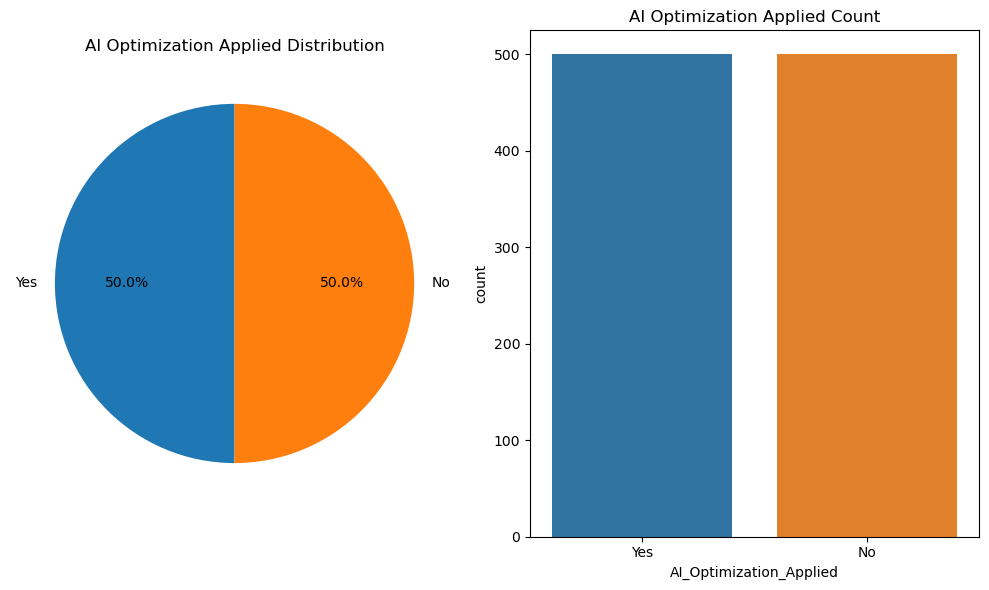

Target Variable Distribution:
AI_Optimization_Applied
Yes    500
No     500
Name: count, dtype: int64


In [72]:
print("3. EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

# Target variable distribution
plt.figure(figsize=(10, 6))
target_dist = df['AI_Optimization_Applied'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('AI Optimization Applied Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='AI_Optimization_Applied')
plt.title('AI Optimization Applied Count')
plt.tight_layout()
plt.show()

print(f"Target Variable Distribution:\n{target_dist}")

# 1.Univariate Analysis


Univariate Analysis - Numerical Features


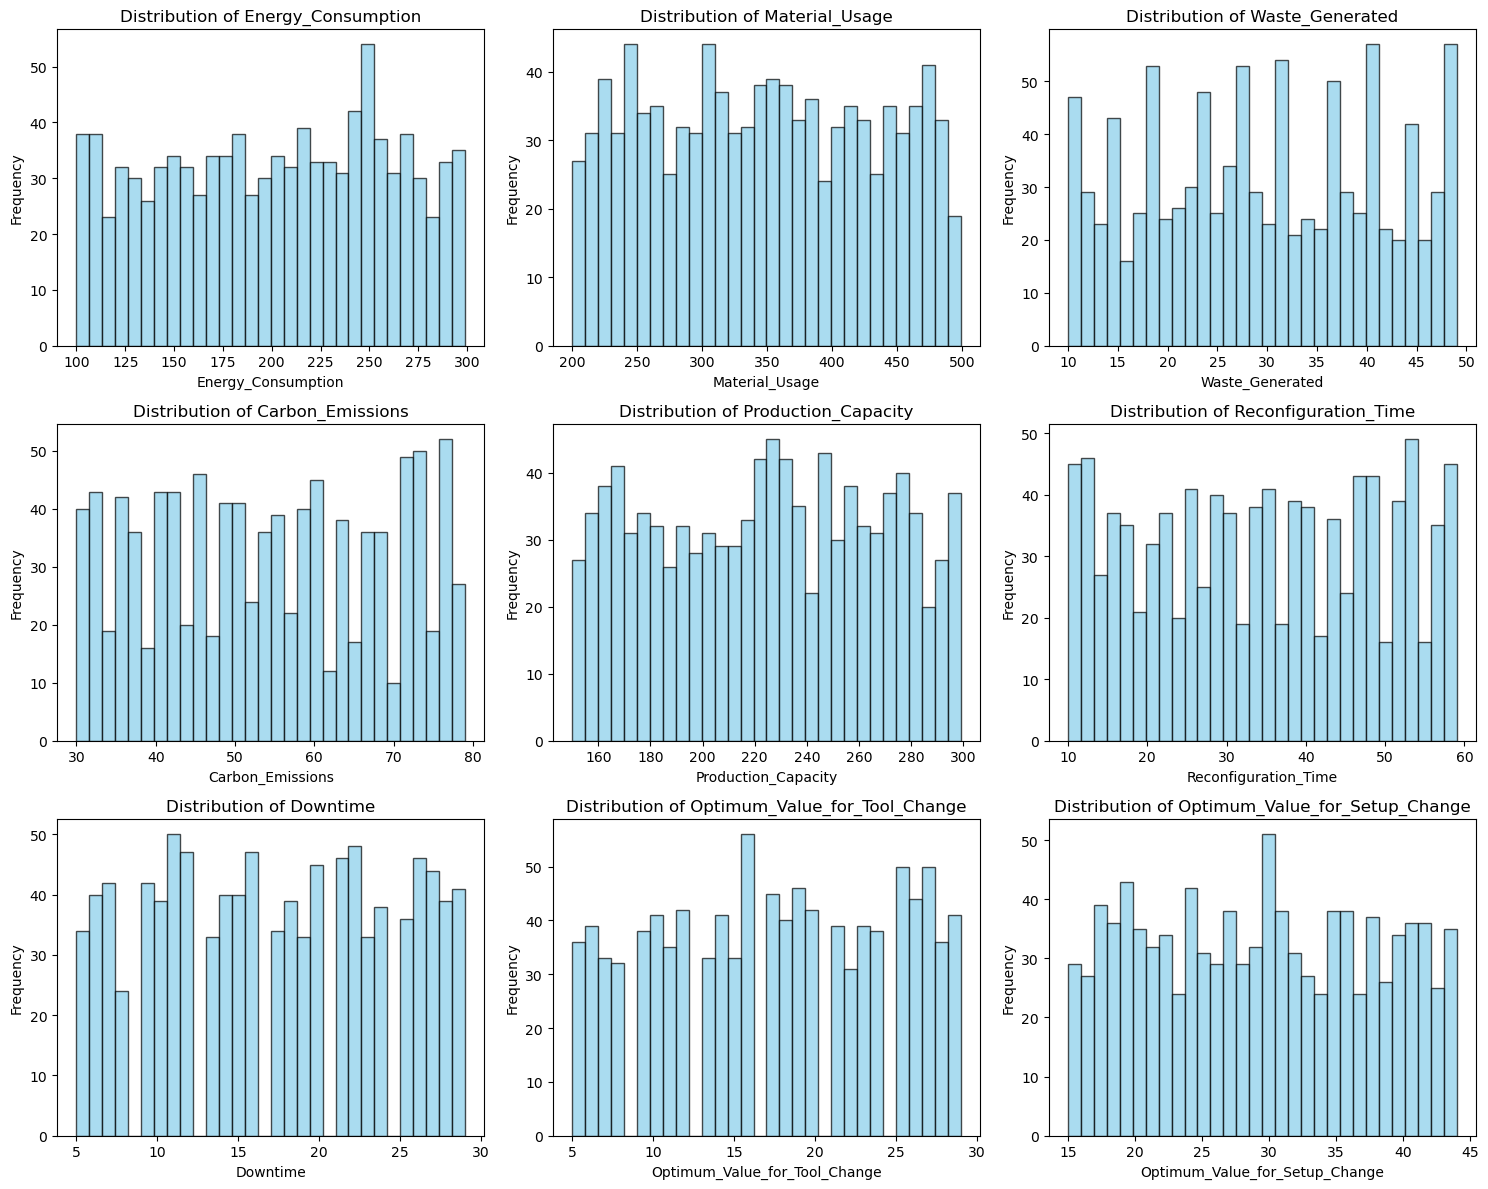

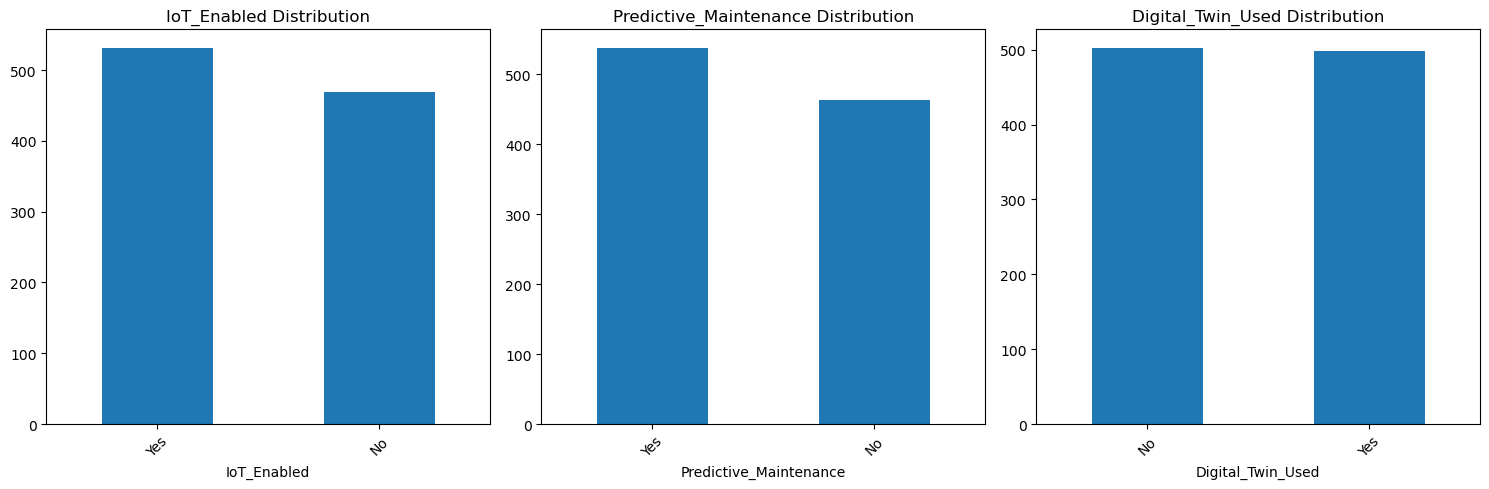

In [76]:
# Numerical features distribution
numerical_features = ['Energy_Consumption', 'Material_Usage', 'Waste_Generated', 
                     'Carbon_Emissions', 'Production_Capacity', 'Reconfiguration_Time', 
                     'Downtime', 'Optimum_Value_for_Tool_Change', 'Optimum_Value_for_Setup_Change']

print("\nUnivariate Analysis - Numerical Features")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Categorical features analysis
categorical_features = ['IoT_Enabled', 'Predictive_Maintenance', 'Digital_Twin_Used']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2.Bivariate Analysis


Bivariate Analysis - AI Optimization vs Numerical Features


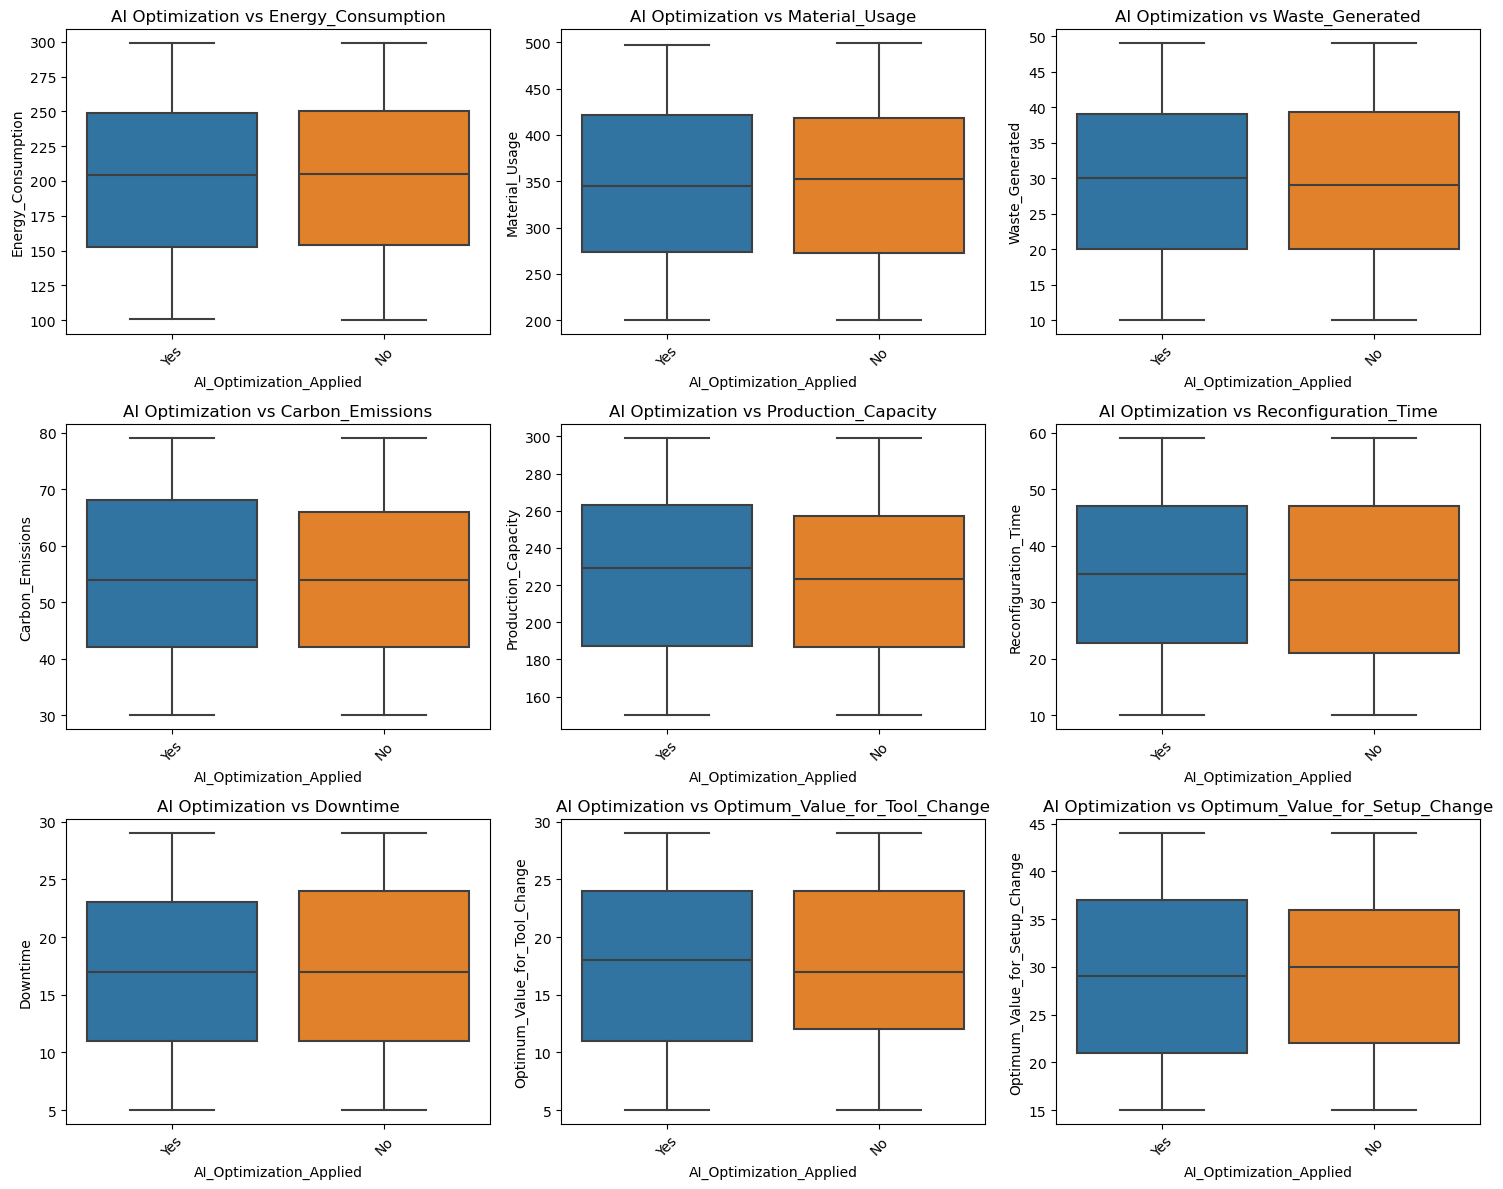


Bivariate Analysis - AI Optimization vs Categorical Features


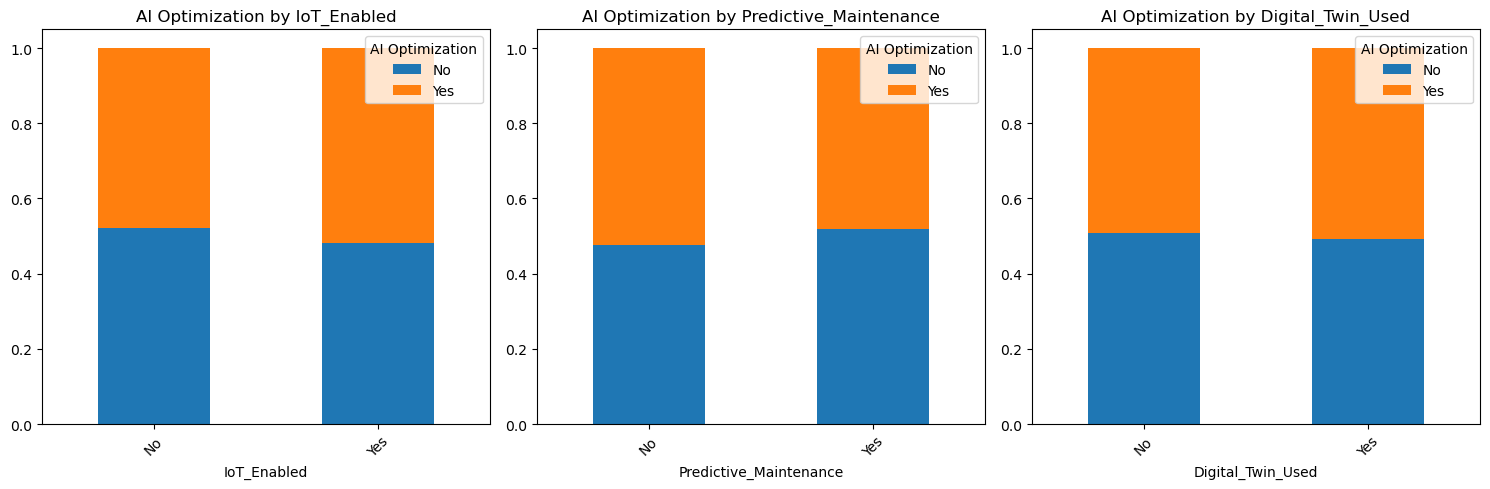

In [78]:
print("\nBivariate Analysis - AI Optimization vs Numerical Features")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='AI_Optimization_Applied', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'AI Optimization vs {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# AI Optimization vs Categorical features
print("\nBivariate Analysis - AI Optimization vs Categorical Features")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    pd.crosstab(df[feature], df['AI_Optimization_Applied'], normalize='index').plot(
        kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'AI Optimization by {feature}')
    axes[i].legend(title='AI Optimization')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3.Multivariate Analysis


Multivariate Analysis
Columns used for correlation analysis:
['Energy_Consumption', 'Material_Usage', 'Waste_Generated', 'Carbon_Emissions', 'Production_Capacity', 'Reconfiguration_Time', 'Downtime', 'Optimum_Value_for_Tool_Change', 'Optimum_Value_for_Setup_Change', 'AI_Optimization_Applied', 'IoT_Enabled', 'Predictive_Maintenance', 'Digital_Twin_Used']


C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


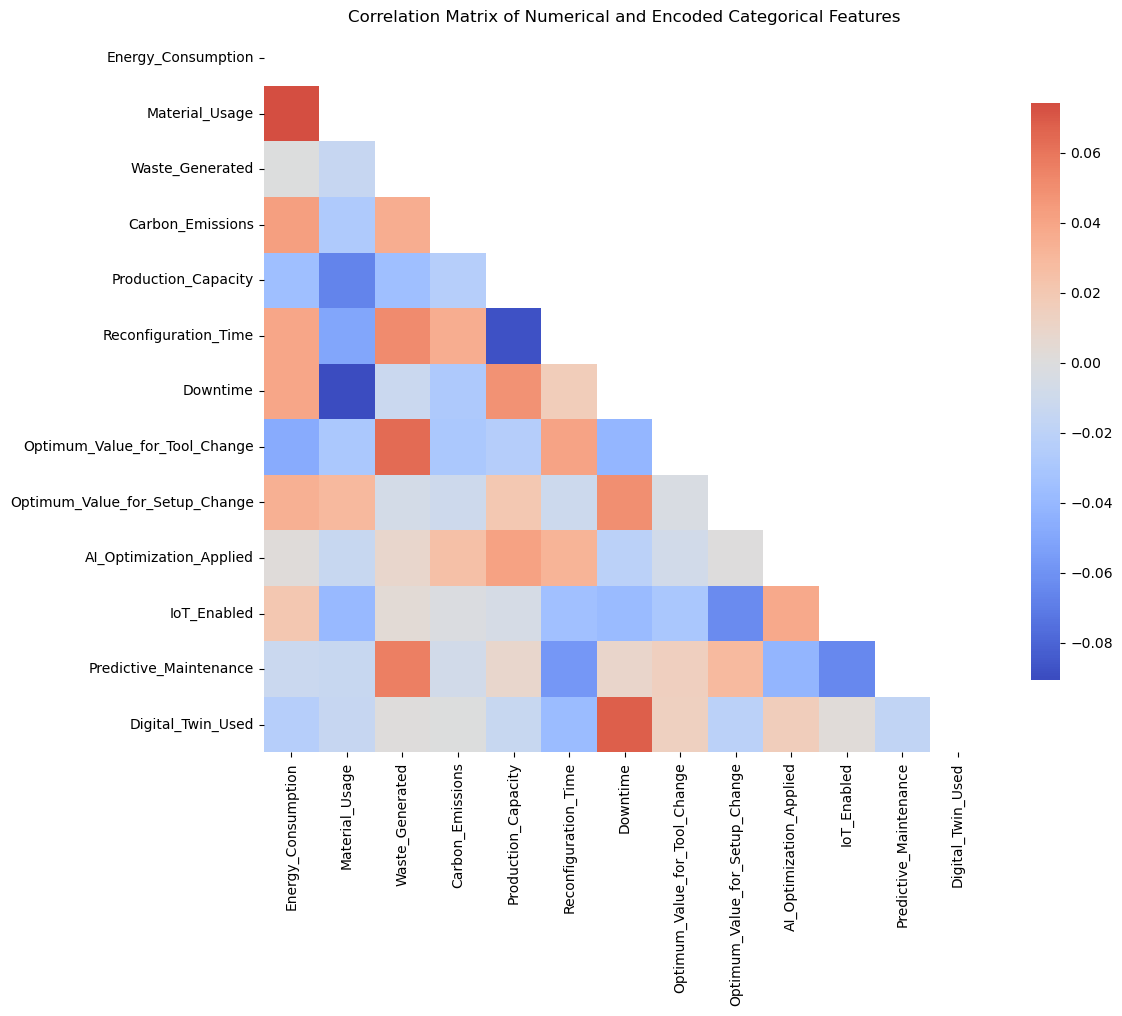


Correlation with AI_Optimization_Applied:
AI_Optimization_Applied           1.000000
Production_Capacity               0.040782
IoT_Enabled                       0.038073
Reconfiguration_Time              0.032272
Carbon_Emissions                  0.024873
Digital_Twin_Used                 0.016000
Waste_Generated                   0.008394
Energy_Consumption                0.001647
Optimum_Value_for_Setup_Change    0.000233
Optimum_Value_for_Tool_Change    -0.008140
Material_Usage                   -0.013943
Downtime                         -0.020698
Predictive_Maintenance           -0.042115
Name: AI_Optimization_Applied, dtype: float64

Strong correlations (|r| > 0.3):
Series([], Name: AI_Optimization_Applied, dtype: float64)


In [80]:
print("\nMultivariate Analysis")
print("="*50)

# Create a copy for correlation analysis
df_corr = df.copy()

# Convert only the relevant categorical variables to numerical
label_encoder = LabelEncoder()
categorical_columns = ['AI_Optimization_Applied', 'IoT_Enabled', 'Predictive_Maintenance', 'Digital_Twin_Used']

for col in categorical_columns:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Select only numerical and encoded categorical columns for correlation
correlation_columns = numerical_features + categorical_columns
df_corr_selected = df_corr[correlation_columns]

print("Columns used for correlation analysis:")
print(correlation_columns)

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_corr_selected.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f',
            mask=mask,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical and Encoded Categorical Features')
plt.tight_layout()
plt.show()

# Display strong correlations with target variable
target_correlations = correlation_matrix['AI_Optimization_Applied'].sort_values(ascending=False)
print("\nCorrelation with AI_Optimization_Applied:")
print(target_correlations)

# Highlight strong correlations (absolute value > 0.3)
strong_correlations = target_correlations[(abs(target_correlations) > 0.3) & (target_correlations.index != 'AI_Optimization_Applied')]
print("\nStrong correlations (|r| > 0.3):")
print(strong_correlations)

# step4:Apply Feature Engineering Techniques

In [82]:
print("4. FEATURE ENGINEERING")
print("="*50)

# Create a copy of the original dataframe
df_processed = df.copy()

print("Missing values before handling:")
print(df_processed.isnull().sum())

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

print("\nOutlier detection:")
for feature in numerical_features:
    outlier_count = detect_outliers(df_processed, feature)
    print(f"{feature}: {outlier_count} outliers")

# Handle outliers using capping method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, 
                         np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

for feature in numerical_features:
    df_processed = handle_outliers(df_processed, feature)

# Feature transformation: Create new features
df_processed['Efficiency_Ratio'] = df_processed['Production_Capacity'] / (df_processed['Energy_Consumption'] + 1)
df_processed['Waste_Ratio'] = df_processed['Waste_Generated'] / (df_processed['Material_Usage'] + 1)
df_processed['Reconfiguration_Efficiency'] = df_processed['Production_Capacity'] / (df_processed['Reconfiguration_Time'] + 1)

# Encoding categorical variables
print("\nEncoding categorical variables...")
binary_columns = ['AI_Optimization_Applied', 'IoT_Enabled', 'Predictive_Maintenance', 'Digital_Twin_Used']

for col in binary_columns:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])
    print(f"{col} encoded: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Create interaction features
df_processed['Tech_Adoption_Score'] = (df_processed['IoT_Enabled'] + 
                                      df_processed['Predictive_Maintenance'] + 
                                      df_processed['Digital_Twin_Used'])

# Feature scaling (will be applied after train-test split)
print("\nNew features created:")
new_features = ['Efficiency_Ratio', 'Waste_Ratio', 'Reconfiguration_Efficiency', 'Tech_Adoption_Score']
print(df_processed[new_features].describe())

print(f"\nDataset shape after feature engineering: {df_processed.shape}")

4. FEATURE ENGINEERING
Missing values before handling:
Factory_ID                        0
Machine_ID                        0
Energy_Consumption                0
Material_Usage                    0
Waste_Generated                   0
Carbon_Emissions                  0
Production_Capacity               0
Reconfiguration_Time              0
Downtime                          0
AI_Optimization_Applied           0
IoT_Enabled                       0
Predictive_Maintenance            0
Digital_Twin_Used                 0
Optimum_Value_for_Tool_Change     0
Optimum_Value_for_Setup_Change    0
dtype: int64

Outlier detection:
Energy_Consumption: 0 outliers
Material_Usage: 0 outliers
Waste_Generated: 0 outliers
Carbon_Emissions: 0 outliers
Production_Capacity: 0 outliers
Reconfiguration_Time: 0 outliers
Downtime: 0 outliers
Optimum_Value_for_Tool_Change: 0 outliers
Optimum_Value_for_Setup_Change: 0 outliers

Encoding categorical variables...
AI_Optimization_Applied encoded: {'No': 0, 'Yes': 1

# step5:Model Building

In [85]:
# Target column
target = "Predictive_Maintenance"

X = df.drop(columns=[target])
y = df[target]

# Encode categorical features if any
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

## Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

# Train model
clf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

          No       0.42      0.27      0.33        93
         Yes       0.51      0.67      0.58       107

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.45       200
weighted avg       0.47      0.48      0.46       200

ROC AUC: 0.4827655512008844


# saving model

In [88]:
joblib.dump( df_processed, "AI_Optimization_Applied.joblib")
print("Model saved to AI_Optimization_Applied.joblib")

Model saved to AI_Optimization_Applied.joblib


# step6:model deployment